In [2]:
%matplotlib inline
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [3]:
# Load datasets
dataset1 = sio.loadmat('ex6/ex6data1.mat')
dataset2 = sio.loadmat('ex6/ex6data2.mat')
dataset3 = sio.loadmat('ex6/ex6data3.mat')

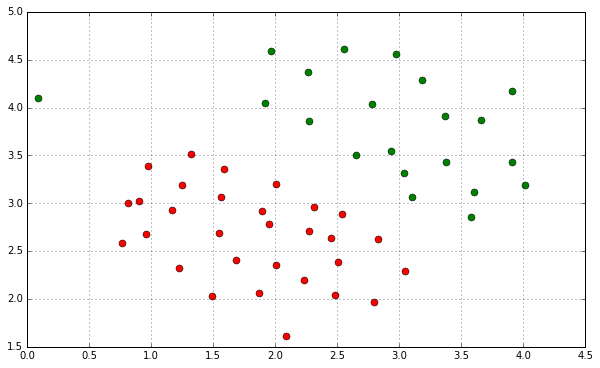

In [10]:
# Extract data
X1 = dataset1['X']
Y1 = dataset1['y']

# Insert bias term
X1 = np.insert(X1,0,1,axis=1)

m = len(Y1)

# Plot initial data
positives = np.array([X1[i] for i in range(m) if Y1[i] == 1])
negatives = np.array([X1[i] for i in range(m) if Y1[i] == 0])

def plotInitialData():
    plt.figure(figsize=(10,6))
    plt.plot(positives[:,1],positives[:,2],'go',markersize=7)
    plt.plot(negatives[:,1],negatives[:,2],'ro',markersize=7)
    plt.grid(True)
    plt.xlim((0.,4.5))
#     plt.ylim((1.5,5.0))


plotInitialData()
# Observe that dataset can be separated by a linear boundary.
# Notice the outlier positive example on the far left (0.1, 4.1)

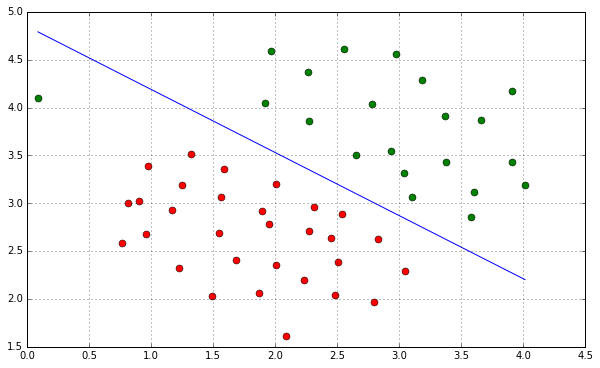

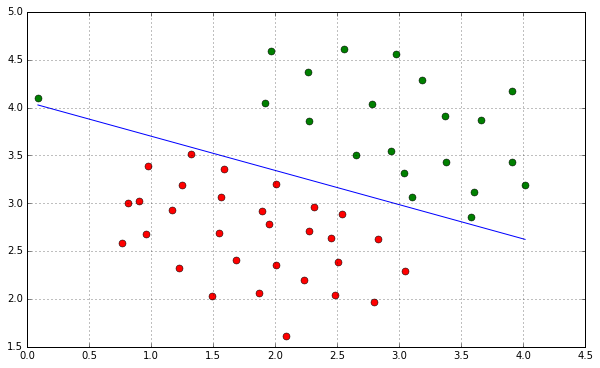

In [24]:
# Try using different values of the C paramter with SVMs.
# The C parameter is a positive value that controls the penalty
# for misclassified training examples.

# I'm going to use scikit-learn's SVM module.
from sklearn import svm
# Try with C = 1
classifierC1 = svm.SVC(C=1, kernel='linear')
classifierC1.fit(X1,Y1.ravel())
# Try with C = 100
classifierC100 = svm.SVC(C=100, kernel='linear')
classifierC100.fit(X1,Y1.ravel())

def plotLinearSVM(X, y, model):
    w = model.coef_
    b = model.intercept_
    xp = np.linspace(min(X[:,1]),max(X[:,1]),100)
    yp = - (w[0][1] * xp + b) / w[0][2]
    plotInitialData()
    plt.plot(xp,yp,'b-',markersize=10)
    
# When C=1 you should find that the SVM puts the decision boundary in
# the gap between the two datasets and misclassifies the data point
# on the far left.
plotLinearSVM(X1,Y1,classifierC1)
# When C = 100, you should find that the SVM now classifies every single example
# correctly, but has a decision boundary that does not appear to be a natural fit
# for the data.
plotLinearSVM(X1,Y1,classifierC100)

#### SVM with Gaussian Kernel

In [25]:
# Use SVMs with Gaussian kernels on datasets that are not linearly separable

In [34]:
def gaussianKernel(x1,x2,sigma):
    return np.exp((-np.sum((x1 - x2)**2) / 2 * (sigma**2)))

# Gaussian kernel between x1 = [1, 2, 1] and x2 = [0, 4, -1] and sigma = 0.5
# should be 0.324652
x1 = np.array([1.,2.,1.])
x2 = np.array([0., 4., -1.])
sigma = 0.5

sim = gaussianKernel(x1,x2,sigma)
print sim

0.324652467358
